In [123]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [205]:
data = pd.read_csv('top_50_stocks_data_formatted.csv')

In [206]:
# Calculating Q1 (25th percentile) and Q3 (75th percentile) for numerical columns
Q1 = data[['Open', 'Close', 'High', 'Low', 'Adjusted Close', 'Volume']].quantile(0.25)
Q3 = data[['Open', 'Close', 'High', 'Low', 'Adjusted Close', 'Volume']].quantile(0.75)

# Calculating IQR for each column
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Used the interquartile range method here, instead of box-plot, because it helps quantitatively define outlier bounds. Using statistical methods, we can precisely handle outliers in our data.

In [207]:
# Capping outliers by replacing them with the nearest valid value within the bounds
data_capped = data.copy()
data_capped[['Open', 'Close', 'High', 'Low', 'Adjusted Close', 'Volume']] = data_capped[['Open', 'Close', 'High', 'Low', 'Adjusted Close', 'Volume']].clip(lower=lower_bound, upper=upper_bound, axis=1)

Capped data here instead of removing it, because removing data gets rid of valuable data points, and reducing sample size. Capping the data preserves its distribution, albeit with adjusted values. It also ensures that the data is not biased, and is representative of all the observations.

In [208]:
# Defining a dictionary to store filtered DataFrames
company_data = {}

# List of company names
company_names = data['Ticker'].unique()

# Filtering data for each company and store in the dictionary
for company in company_names:
    company_data[company] = data_capped[data_capped['Ticker'] == company]

In [209]:
#Taking company input
company = input("Enter the company's abbreviated name:")
stock_data = company_data[company]

#Finding closing prices
closing_prices = stock_data['Close']

# Fitting the ARIMA model for company's stock
model = ARIMA(closing_prices, order=(5,1,0))
model_fit = model.fit()

# Making predictions for company's stock
predictions = model_fit.predict(typ='levels')

Enter the company's abbreviated name: AAPL


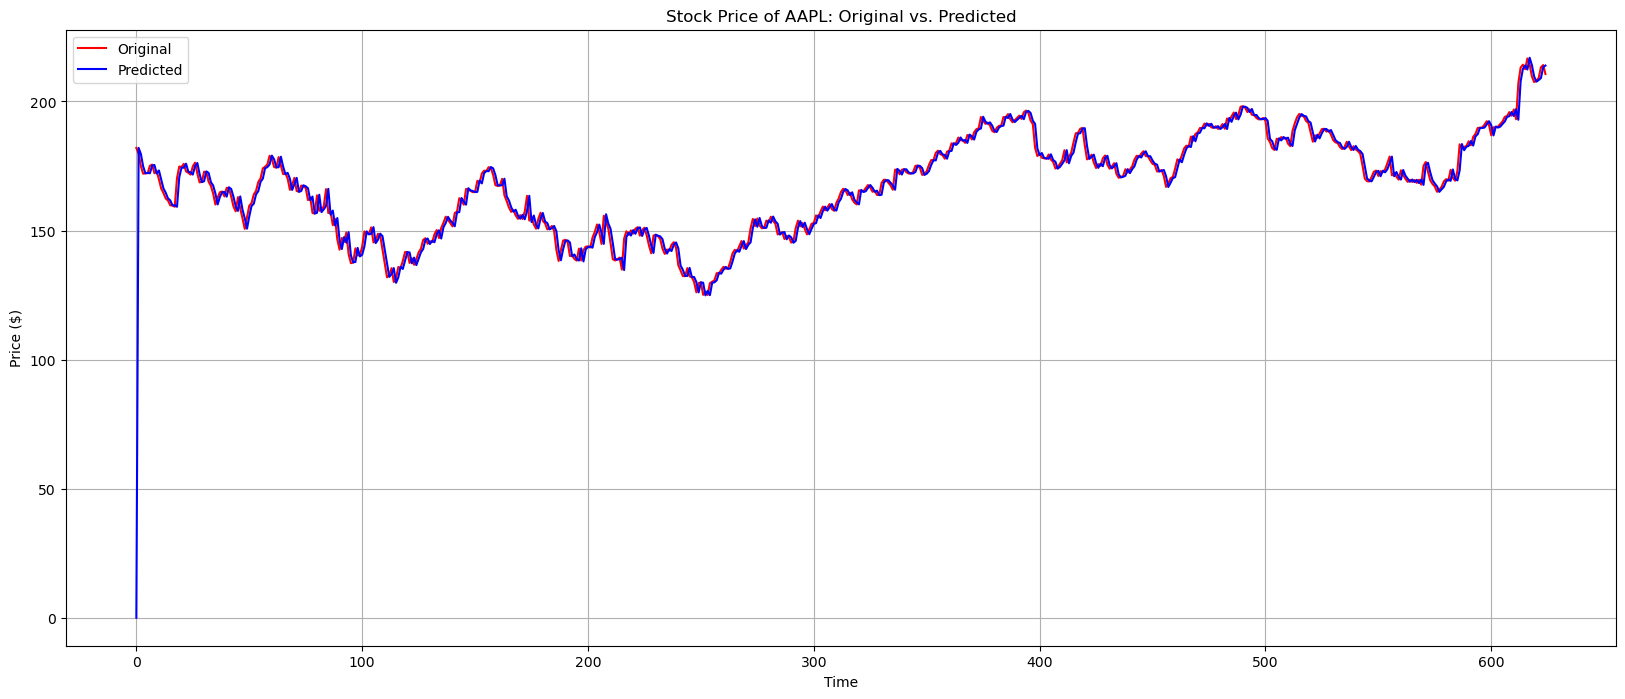

In [210]:
# Plot the original and predicted closing prices
plt.figure(figsize=(20,8))
plt.plot(closing_prices, color='red', label='Original')
plt.plot(predictions, color='blue', label='Predicted')
plt.title(f'Stock Price of {company}: Original vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [211]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [191]:
#Checking error percentage
mape_company = mean_absolute_percentage_error(closing_prices, predictions)
print(f"MAPE: {mape_company:.2f}%")

MAPE: 1.51%


In [134]:
#Forecasting future values
forecast = model_fit.get_forecast(steps=10).predicted_mean
print(f"{company} forecast:\n", forecast)

NVDA forecast:
 625    123.506063
626    123.878906
627    123.857617
628    123.735971
629    123.711325
630    123.724469
631    123.741774
632    123.738453
633    123.732082
634    123.731214
Name: predicted_mean, dtype: float64


C:\Users\angel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\angel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
